# Exploring the Colour Palettes of Oppenheimer and Barbie

This project explores the fascinating intersection of colour usage in film and machine learning. It focuses on two distinct films, “Oppenheimer” and “Barbie”, through visualisations and colour palette extraction. The study further extends to the application of machine learning models, specifically K-Nearest Neighbours (KNN) and Random Forest Classifiers (RFC), to classify images based on their film origin. The performance of these models is evaluated using two types of inputs - the extracted colour palettes and the raw image data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.colors as mplcol
import glob
from tqdm import tqdm
import warnings

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Two sample images from each of the films are loaded. This produces an array of shape: (height, width, channels). Where height and width are the number of pixels, with three channels for each of the RGB channels. Note: the resolution of images in the actual dataset has been reduced to improve computational efficiency.

In [ ]:
oppenheimer_sample = '/content/drive/MyDrive/Data/sample_images/oppenheimer-still.jpg'
barbie_sample = '/content/drive/MyDrive/Data/sample_images/Barbie_example_2.jpg'

oppenheimer_img = plt.imread(oppenheimer_sample)
barbie_img = plt.imread(barbie_sample)

print('Shape of Oppenheimer sample image:', oppenheimer_img.shape)
print('Shape of Barbie sample image:', barbie_img.shape)

Shape of Oppenheimer sample image: (2160, 3840, 3)
Shape of Barbie sample image: (960, 1920, 3)


Below are the two sample images. These will be used for the following visualisations.

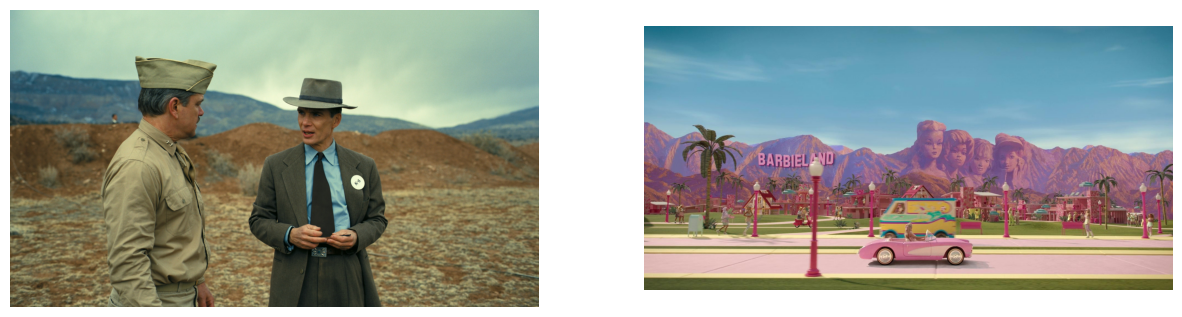

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
ax1.imshow(oppenheimer_img)
ax1.axis('off')
ax2.imshow(barbie_img)
ax2.axis('off')
plt.show()

## Colour Visualisations

The unique colours in each image can be visualised in a 3D space, where each axis represents one of the RGB channels:

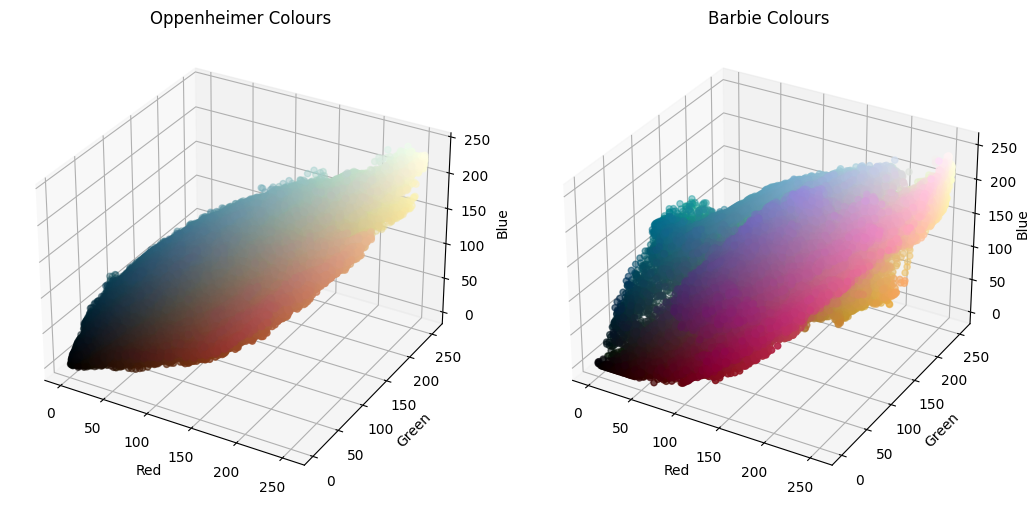

In [ ]:
oppenheimer_img = Image.open(oppenheimer_sample)
px = np.array(oppenheimer_img)
opp_colours, opp_counts = np.unique(px.reshape(-1, 3), axis=0, return_counts=True) # prevents plotting duplicates

barbie_img = Image.open(barbie_sample)
px = np.array(barbie_img)
bar_colours, bar_counts = np.unique(px.reshape(-1, 3), axis=0, return_counts=True)

fig = plt.figure(figsize=(13, 6))

ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
ax1.set_title('Oppenheimer Colours')
ax1.scatter(opp_colours[:, 0], opp_colours[:, 1], opp_colours[:, 2], c=opp_colours/255) # /255 required to normalise RGB to 0-1
ax1.set_xlabel('Red')
ax1.set_ylabel('Green')
ax1.set_zlabel('Blue', rotation=90)
ax1.set_zbound(upper=250)

ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
ax2.set_title('Barbie Colours')
ax2.scatter(bar_colours[:, 0], bar_colours[:, 1], bar_colours[:, 2], c=bar_colours/255)
ax2.set_xlabel('Red')
ax2.set_ylabel('Green')
ax2.set_zlabel('Blue', rotation=90, labelpad=0.5)

plt.subplots_adjust(wspace=0.1)
plt.show()

Immediately a difference between the colours used in each image can be seen. The colours in Barbie are more saturated with brighter colours such as pink making up much of the image.

Now a 3D histogram is plotted to show the frequency distribution for colour values in the images. Each point is a pixel in the image with a certain RGB value (0-255). Each bar corresponds to a specific colour, and the values on the z-axis show its frequency.

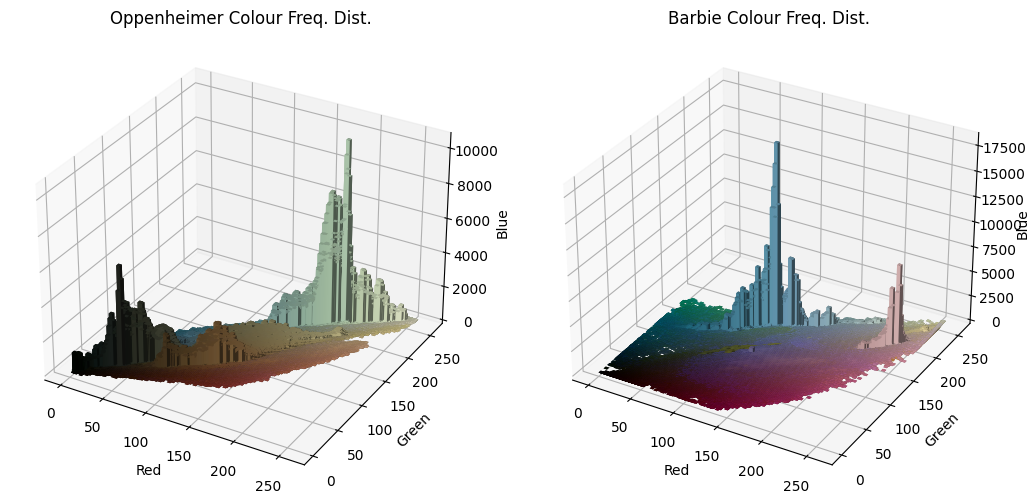

In [ ]:
fig = plt.figure(figsize=(13, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.bar3d(opp_colours[:, 0], opp_colours[:, 1], opp_colours[:, 2], 4, 4, opp_counts, color=opp_colours/255)
ax1.set_title('Oppenheimer Colour Freq. Dist.')
ax1.set_xlabel('Red')
ax1.set_ylabel('Green')
ax1.set_zlabel('Blue', rotation=90)

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.bar3d(bar_colours[:, 0], bar_colours[:, 1], bar_colours[:, 2], 4, 4, bar_counts, color=bar_colours/255)
ax2.set_title('Barbie Colour Freq. Dist.')
ax2.set_xlabel('Red')
ax2.set_ylabel('Green')
ax2.set_zlabel('Blue', rotation=90, labelpad=0.5)

plt.subplots_adjust(wspace=0.1)
plt.show()

The colour frequency distributions reveal distinct colour profiles for Oppenheimer and Barbie. Oppenheimer's colour palette is dominated by shades of green and a mix of orange and brown, while Barbie's palette exhibits a higher frequency of blues and a range of pinks to reds. Interestingly, Barbie's colour distribution is more diverse, as indicated by a broader spread of colours, suggesting a larger number of unique colour values. In contrast, Oppenheimer's palette includes a higher frequency of darker hues.

The colour wheel, a circular arrangement of hues, serves as a fundamental tool in colour theory, aiding in the identification of harmonious colour combinations. When colours from a film image are mapped onto this wheel, it provides a distinctive visual representation, enabling a deeper understanding of the colour dynamics employed within the film.

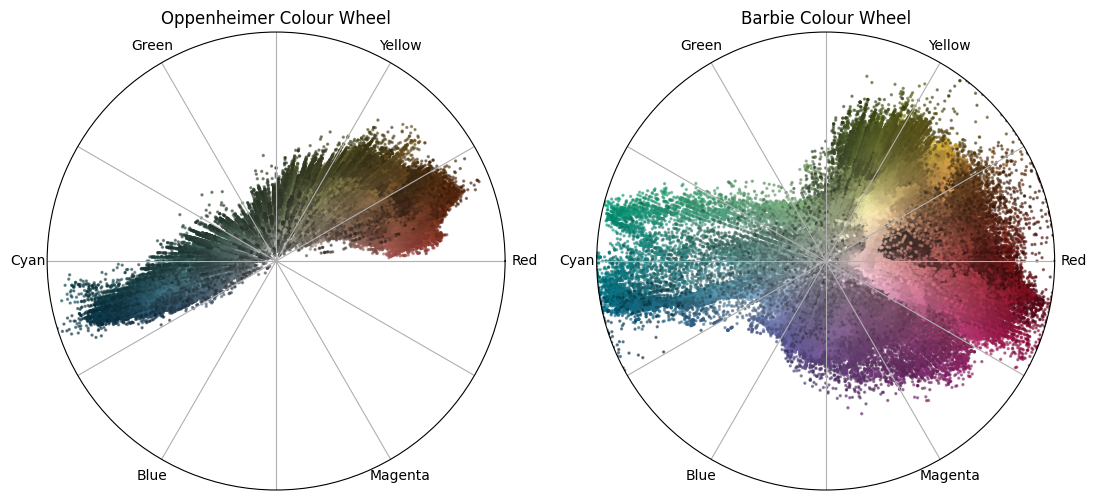

In [ ]:
# visualise colours in a colour wheels

def get_values_for_colour_wheel(image):
    px = np.array(image)

    # get the hue, saturation, and value of the colors
    hsv = np.apply_along_axis(lambda x: mplcol.rgb_to_hsv(x/255), 2, px)
    hue = hsv[:, :, 0]
    sat = hsv[:, :, 1]
    val = hsv[:, :, 2]

    # convert hue to radians for polar plot
    hue_rad = hue * 2 * np.pi

    # convert hsv back to rgb for marker colours
    rgb = mplcol.hsv_to_rgb(hsv)

    # set a threshold for value (brightness) to prevent many dark points
    value_threshold = 0.2
    mask = val > value_threshold
    hue_rad_masked = hue_rad[mask]
    sat_masked = sat[mask]
    rgb_masked = rgb[mask]

    return hue_rad_masked, sat_masked, rgb_masked

opp_hue_rad_masked, opp_sat_masked, opp_rgb_masked = get_values_for_colour_wheel(oppenheimer_img)
bar_hue_rad_masked, bar_sat_masked, bar_rgb_masked = get_values_for_colour_wheel(barbie_img)

# plot the color wheels
fig = plt.figure(figsize=(13, 6))

ax1 = fig.add_subplot(1, 2, 1, projection='polar')
ax1.scatter(opp_hue_rad_masked.flatten(), opp_sat_masked.flatten(), c=opp_rgb_masked.reshape(-1, 3), s=2, alpha=0.5)
ax1.set_title('Oppenheimer Colour Wheel')
ax1.set_rmax(1)
ax1.set_rticks([])
ax1.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
ax1.set_xticklabels(['Red', '', 'Yellow', '', 'Green', '', 'Cyan', '', 'Blue', '', 'Magenta', ''])

ax2 = fig.add_subplot(1, 2, 2, projection='polar')
ax2.scatter(bar_hue_rad_masked.flatten(), bar_sat_masked.flatten(), c=bar_rgb_masked.reshape(-1, 3), s=2, alpha=0.5)
ax2.set_title('Barbie Colour Wheel')
ax2.set_rmax(1)
ax2.set_rticks([])
ax2.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False))
ax2.set_xticklabels(['Red', '', 'Yellow', '', 'Green', '', 'Cyan', '', 'Blue', '', 'Magenta', ''])
plt.show()

The Barbie colour wheel exhibits a broad spectrum of hues and shades, reflecting a diverse and lively colour palette. Both films utilise complementary colours, which are positioned opposite each other on the wheel. This usage is especially noticeable in the case of Oppenheimer.

Whilst the above colour representations are useful, they are very data rich, oftentimes a more simplified visualisation of colours is preferred. One common method is to produce colour palettes consisting of only the most important colours in the image that are representative of the scene as a whole. One way to produce these colour palettes is to use a machine learning technique called clustering. The idea is to group data points (colours) that are most closely similar to other data points in their group and less similar to data points in other groups. The central point of each cluster can be taken as the representative colour of that cluster, thus creating a colour palette consisting of a broad range of colours in the image.

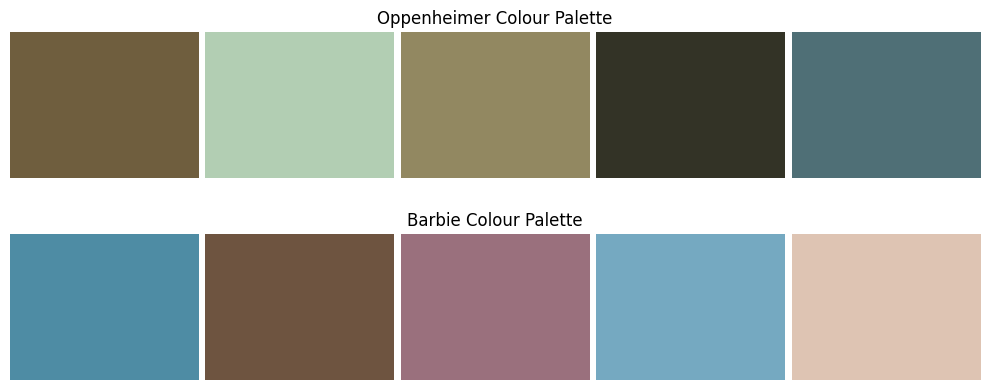

In [ ]:
# oppenheimer
px = np.array(oppenheimer_img)
X = px.reshape(-1, 3)

kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
opp_centers = kmeans.cluster_centers_

# barbie
px = np.array(barbie_img)
X = px.reshape(-1, 3)

kmeans = KMeans(n_clusters=5, n_init=10, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
bar_centers = kmeans.cluster_centers_

# plot color palettes
fig, axs = plt.subplots(2, 5, figsize=(10, 4), constrained_layout=True)

for sp in range(5):
    axs[0, sp].imshow([[opp_centers[sp]/255]], aspect='auto')
    axs[0, sp].axis('off')
    axs[1, sp].imshow([[bar_centers[sp]/255]], aspect='auto')
    axs[1, sp].axis('off')

axs[0, 2].set_title('Oppenheimer Colour Palette')
axs[1, 2].set_title('Barbie Colour Palette')

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.tight_layout(w_pad=0.5, h_pad=2.4)
plt.show()

In this example, k-means clustering was performed with 5 clusters to get 5 different colours for each of the palettes. The Oppenheimer palette consists of more muted and earthy colours such as celadon and dark moss green. Whereas, Barbie includes more vibrant colours such as coral, pink and light blue.


## Classification Problem

In the following section, the application of two distinct machine learning models is explored, tasked with the classification of a given image to its corresponding film. The performance of these models will be evaluated based on inputs derived from K-means clustering as well as raw image data.

In [ ]:
oppenheimer_images = '/content/drive/MyDrive/Data/Oppenheimer_images/*.jpeg'
barbie_images = '/content/drive/MyDrive/Data/Barbie_images/*.jpeg'

opp_files = glob.glob(oppenheimer_images)
barbie_files = glob.glob(barbie_images)

print(f'The dataset consists of {len(opp_files)} Oppenheimer images and {len(barbie_files)} Barbie images.')

The dataset consists of 678 Oppenheimer images and 644 Barbie images.


### Feature extraction

K-means is applied for feature extraction, as carried out previously for the creation of the colour palettes.

In [ ]:
def kmeans_feature_extraction(files):
    X_list,y = [],[]

    for file in tqdm(files):

        img = Image.open(file)
        px = np.array(img)
        x = px.reshape(-1, 3)

        kmeans = KMeans(n_clusters=5, n_init = 10, random_state=0)
        kmeans.fit(x)
        centers = kmeans.cluster_centers_
        X_list.append(centers/255) # normalise RGB to between 0-1

        if file in barbie_files:
            y.append('Barbie')
        else:
            y.append('Oppenheimer')

    X = np.stack(X_list) # convert to 3D numpy array

    return X, np.array(y)

files = opp_files + barbie_files
#X, y = kmeans_feature_extraction(files) # saved to .npy files and loaded below

100%|██████████| 1322/1322 [1:06:12<00:00,  3.00s/it]


In [ ]:
# saved X, y to files
#np.save('extracted_features/X.npy', X)
#np.save('extracted_features/y.npy', y)

# load X, y
X = np.load('extracted_features/X.npy')
y = np.load('extracted_features/y.npy')

# expect X shape (1322, 5, 3), y shape (1322,)
print('X shape:', X.shape)
print('y shape:', y.shape)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X shape: (1322, 5, 3)
y shape: (1322,)


The raw image features will also be explored as model inputs.

In [ ]:
def raw_feature_extraction(files):
    X = []

    for file in tqdm(files):
        img = Image.open(file)
        img_resized = img.resize((640, 320))
        px = np.array(img_resized)
        X.append(px.flatten())

    X = np.stack(X) # convert to 2D array

    return X

files = opp_files + barbie_files
X_raw = raw_feature_extraction(files) # y remains the same as before

100%|██████████| 1322/1322 [00:07<00:00, 170.10it/s]


In [ ]:
# saved X_raw to file
#np.save('extracted_features/X_raw.npy', X_raw)

# load X_raw
X_raw = np.load('extracted_features/X_raw.npy')

# expect X shape (1322, 640*320*3), y shape (1322,)
print('X_raw shape:', X_raw.shape)
print('y shape:', y.shape)
X_raw_train, X_raw_val, y_train, y_val = train_test_split(X_raw, y, test_size=0.2, random_state=42)

X_raw shape: (1322, 614400)
y shape: (1322,)


### K-Nearest Neighbors (KNN) Classifier

In [ ]:
# KNN using features from K-means
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train.reshape(len(X_train), -1), y_train)

# get predictions for validation set
y_pred = knn.predict(X_val.reshape(len(X_val), -1))
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Barbie       0.78      0.64      0.70       114
 Oppenheimer       0.76      0.86      0.81       151

    accuracy                           0.77       265
   macro avg       0.77      0.75      0.75       265
weighted avg       0.77      0.77      0.76       265



The KNN classifier produced an overall accuracy of 0.77. The model performs reasonably well on both classes, with slightly better for Oppenheimer images.

In [ ]:
# KNN using raw image data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_raw_train, y_train)

y_pred_knn = knn.predict(X_raw_val)
print(classification_report(y_val, y_pred_knn))

              precision    recall  f1-score   support

      Barbie       0.85      0.48      0.61       114
 Oppenheimer       0.70      0.93      0.80       151

    accuracy                           0.74       265
   macro avg       0.78      0.71      0.71       265
weighted avg       0.77      0.74      0.72       265



The KNN model performed worse using raw image data (accuracy of 0.74) compared with the K-means features. This could be because K-means feature extraction reduced the dimensionality of the data and captured key features that helped in classification.

### Random Forest Classifier (RFC)

In [ ]:
# RFC using features from K-means
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train.reshape(len(X_train), -1), y_train)

y_pred = rf.predict(X_val.reshape(len(X_val), -1))
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

      Barbie       0.79      0.87      0.82       114
 Oppenheimer       0.89      0.82      0.86       151

    accuracy                           0.84       265
   macro avg       0.84      0.84      0.84       265
weighted avg       0.85      0.84      0.84       265



The RFC performs well for both films, with slightly better performance for Barbie images. The overall accuracy achieved was 0.84. This model also has a better balance between precision and recall than the KNN models, as indicated by the higher f1-scores.

In [ ]:
# RFC using raw image data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_raw_train, y_train)

y_pred_rf = rf.predict(X_raw_val)
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

      Barbie       0.83      0.86      0.84       114
 Oppenheimer       0.89      0.87      0.88       151

    accuracy                           0.86       265
   macro avg       0.86      0.86      0.86       265
weighted avg       0.87      0.86      0.86       265



The RFC model performed similarly with raw image data (accuracy of 0.86). This suggests that the RFC was able to handle the high-dimensional raw image data and capture the key features for classification.

## Conclusion

The differences in colours between the films Oppenheimer and Barbie have been explored through visualisations and colour palette extraction. The performance of two machine learning models, K-Nearest Neighbours (KNN) and Random Forest Classifiers (RFC), has been investigated in classifying images based on their film origin. The findings indicate that RFCs, being tree-based models, are more adept at handling high-dimensional raw image data compared to distance-based KNN models. The RFC model, when applied to the raw image data, achieved the highest accuracy of 0.86. Therefore, whilst extracting colour palettes can be useful for visualising the colour design of the films, they provide little additional benefit when used as input features for film classification. This could be attributed to the fact that color palettes capture a reduced and simplified representation of the images, potentially overlooking subtle but important differences that the RFC model could pick up from the raw image data. Furthermore, it is expected that the performance of colour palette features will may diminish when applied to other films with less pronounced colour differences. Future work could explore other feature extraction techniques and machine learning models.
